# Peronsality Type
- [Dataset](https://www.kaggle.com/datasets/datasnaek/mbti-type?resource=download&select=mbti_1.csv)

In [3]:
#!pip install spacy transformers nltk textblob
#!python -m spacy download en_core_web_sm
#!pip install wordcloud
#!pip install nltk
#!pip install scikit-learn
#!pip install -U numpy
#!pip install tensorflow


## Importing the libraries

In [1]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Data preprocessing and initial Analysis

In [2]:
df=pd.read_csv('/workspaces/personality-type-/mbti-type/mbti_1.csv')

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


## Data Cleaning

In [4]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

df['posts'] = df['posts'].apply(clean_text)

## Class Distribution

/tmp/ipykernel_49112/3878955178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


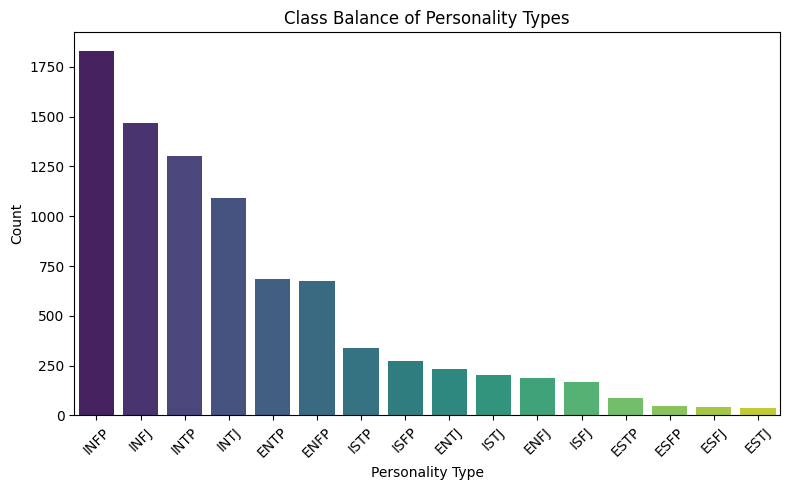

In [7]:
plt.figure(figsize=(8, 5))
class_counts = df['type'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Balance of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Message length distribution 

/tmp/ipykernel_49112/2437274654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='message_length', data=df, palette='pastel')


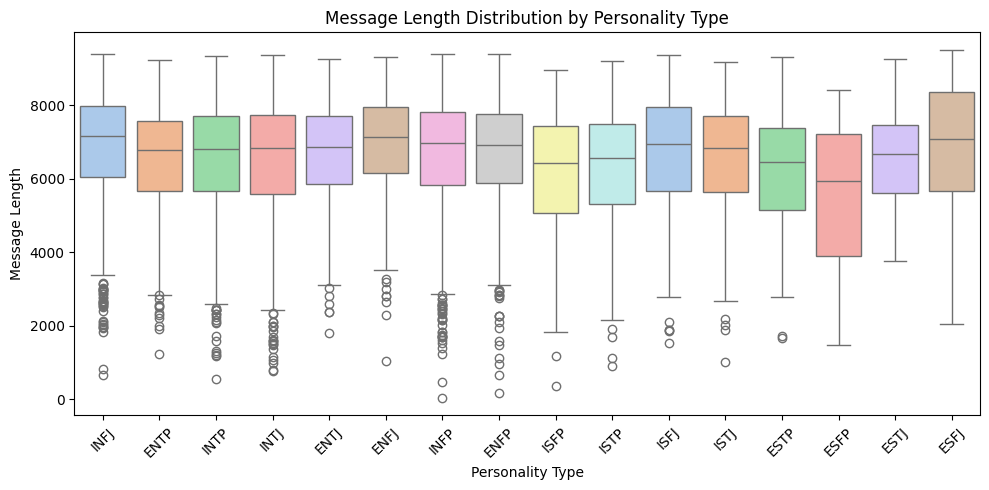

In [8]:
df['message_length'] = df['posts'].str.len()
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='message_length', data=df, palette='pastel')
plt.title('Message Length Distribution by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Message Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Overall Wordcloud

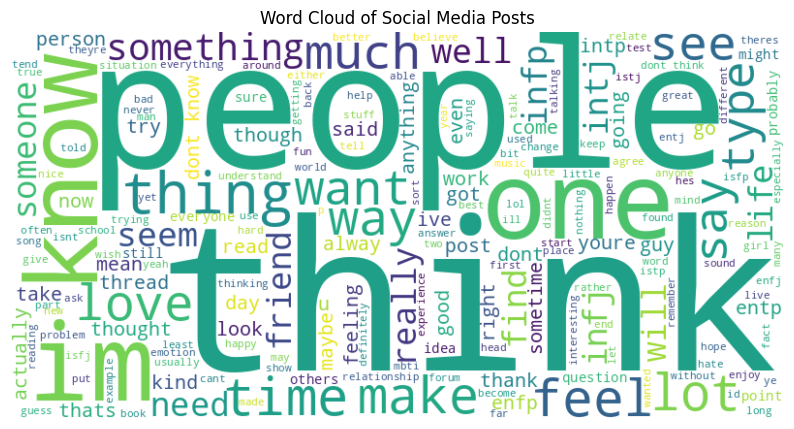

In [9]:
all_text = ' '.join(df['posts'])
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Social Media Posts')
plt.show()

## Word cloud for the personality types 

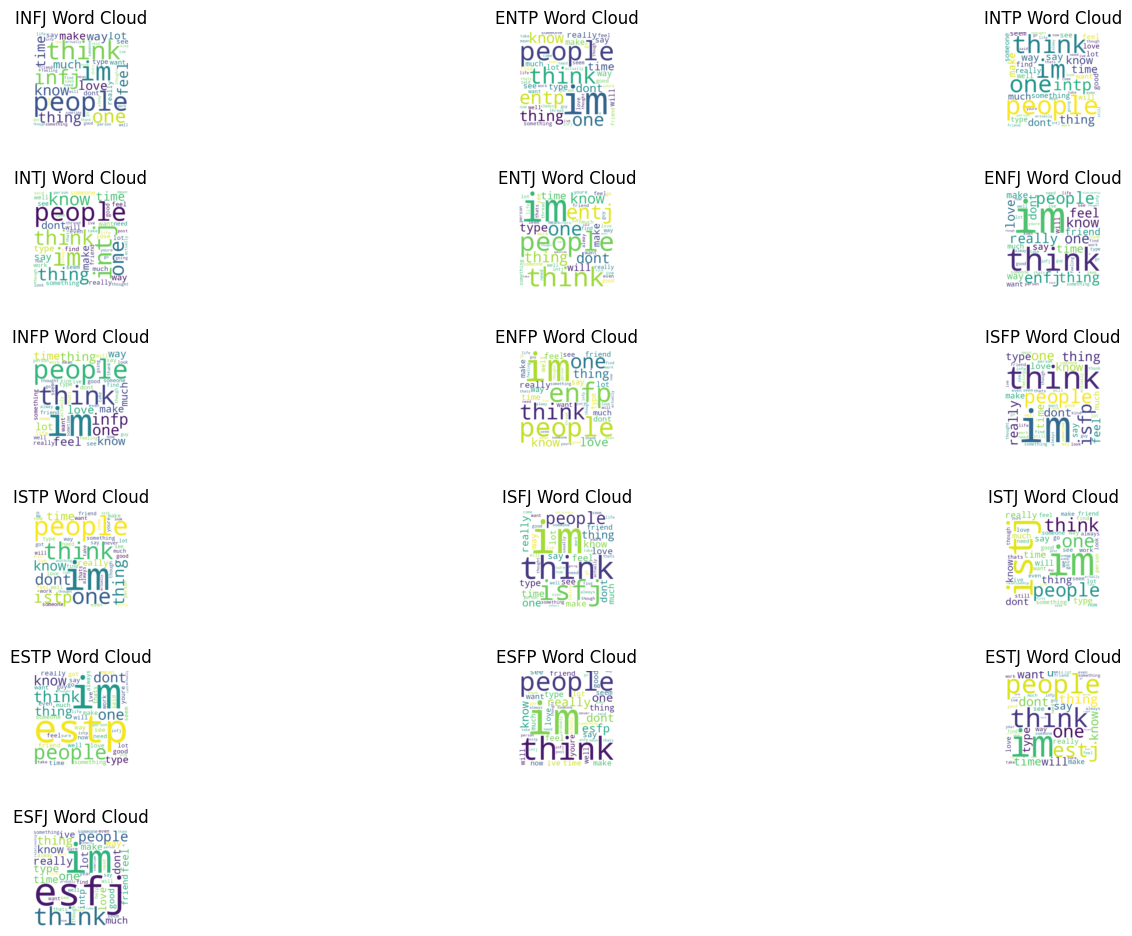

In [10]:
personality_types = df['type'].unique()
    
# Create subplot grid
fig = plt.figure(figsize=(15, 10))
rows = (len(personality_types) + 2) // 3  # Calculate needed rows
cols = min(3, len(personality_types))

# Generate word cloud for each personality type
for idx, p_type in enumerate(personality_types, 1):
    # Get text for current personality type
    text = ' '.join(df[df['type'] == p_type]['posts'])
    
    # Create word cloud
    wordcloud = WordCloud(
        width=400,
        height=400,
        background_color='white',
        max_words=50,
        contour_width=3,
        contour_color='steelblue'
    ).generate(text)
    
    # Add subplot
    plt.subplot(rows, cols, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{p_type} Word Cloud')
    plt.axis('off')

plt.tight_layout(pad=3.0)
plt.show()

## Post Distribution

/tmp/ipykernel_49112/3036759258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_counts.index, y=post_counts.values, palette='viridis')


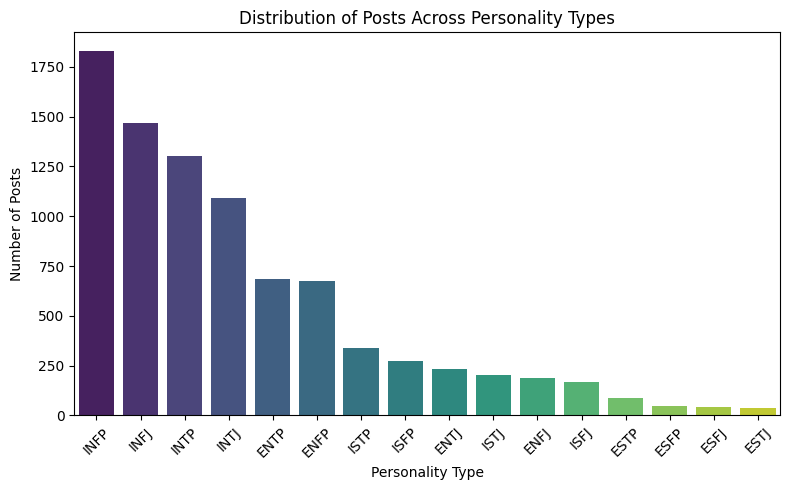

In [11]:
plt.figure(figsize=(8, 5))
post_counts = df['type'].value_counts()
sns.barplot(x=post_counts.index, y=post_counts.values, palette='viridis')
plt.title('Distribution of Posts Across Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modelling

In [5]:
X = df['posts']
y = df['type']

X.shape, y.shape

((8675,), (8675,))

Epoch 1/30


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0565 - loss: 5.1137 - val_accuracy: 0.1290 - val_loss: 3.9795 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0630 - loss: 4.4457 - val_accuracy: 0.1160 - val_loss: 3.7690 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0700 - loss: 3.7114 - val_accuracy: 0.0771 - val_loss: 3.9801 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0852 - loss: 3.4135 - val_accuracy: 0.0259 - val_loss: 4.4166 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0906 - loss: 3.1589 - val_accuracy: 0.0259 - val_loss: 4.2339 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1124 - loss: 2.9540 - val_accuracy: 0.0785 - val_loss: 3.7316 - learning_rate: 2.0000e-04
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1298 - loss: 2.7414 - val_accuracy: 

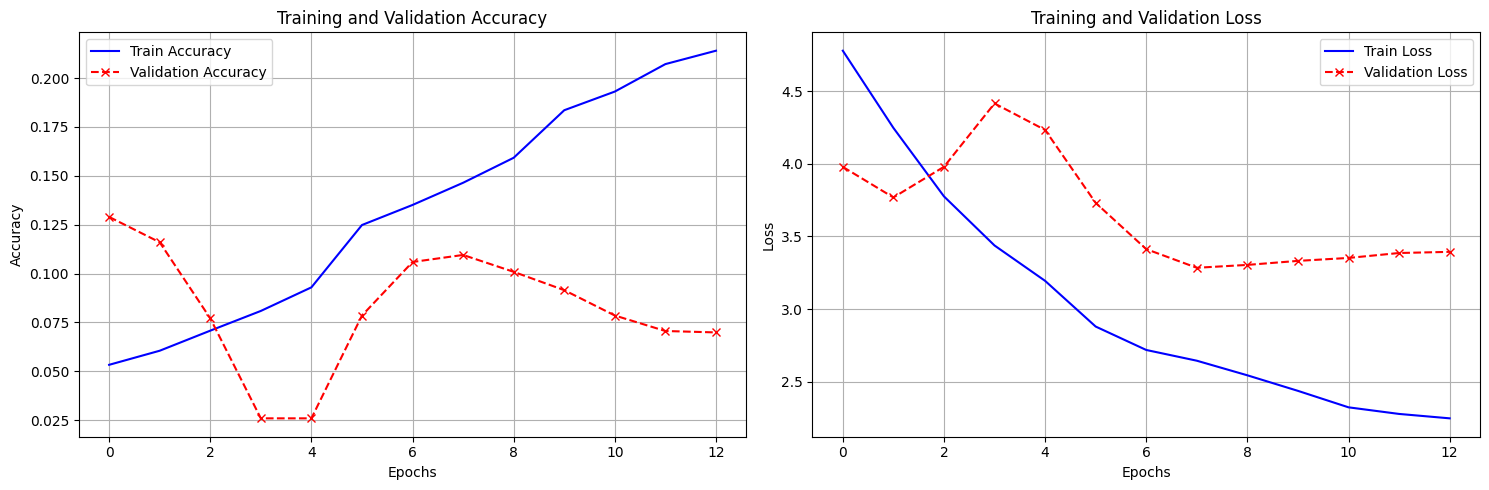

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.03      0.16      0.05        38
        ENFP       0.10      0.02      0.04       135
        ENTJ       0.03      0.09      0.04        46
        ENTP       0.06      0.01      0.02       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.18      0.32      0.23       294
        INFP       0.23      0.10      0.14       366
        INTJ       0.13      0.12      0.12       218
        INTP       0.12      0.10      0.11       261
        ISFJ       0.03      0.03      0.03        33
        ISFP       0.03      0.07      0.04        54
        ISTJ       0.04      0.05      0.04        41
        ISTP       0.00      0.00      0.00        67

    accuracy     

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


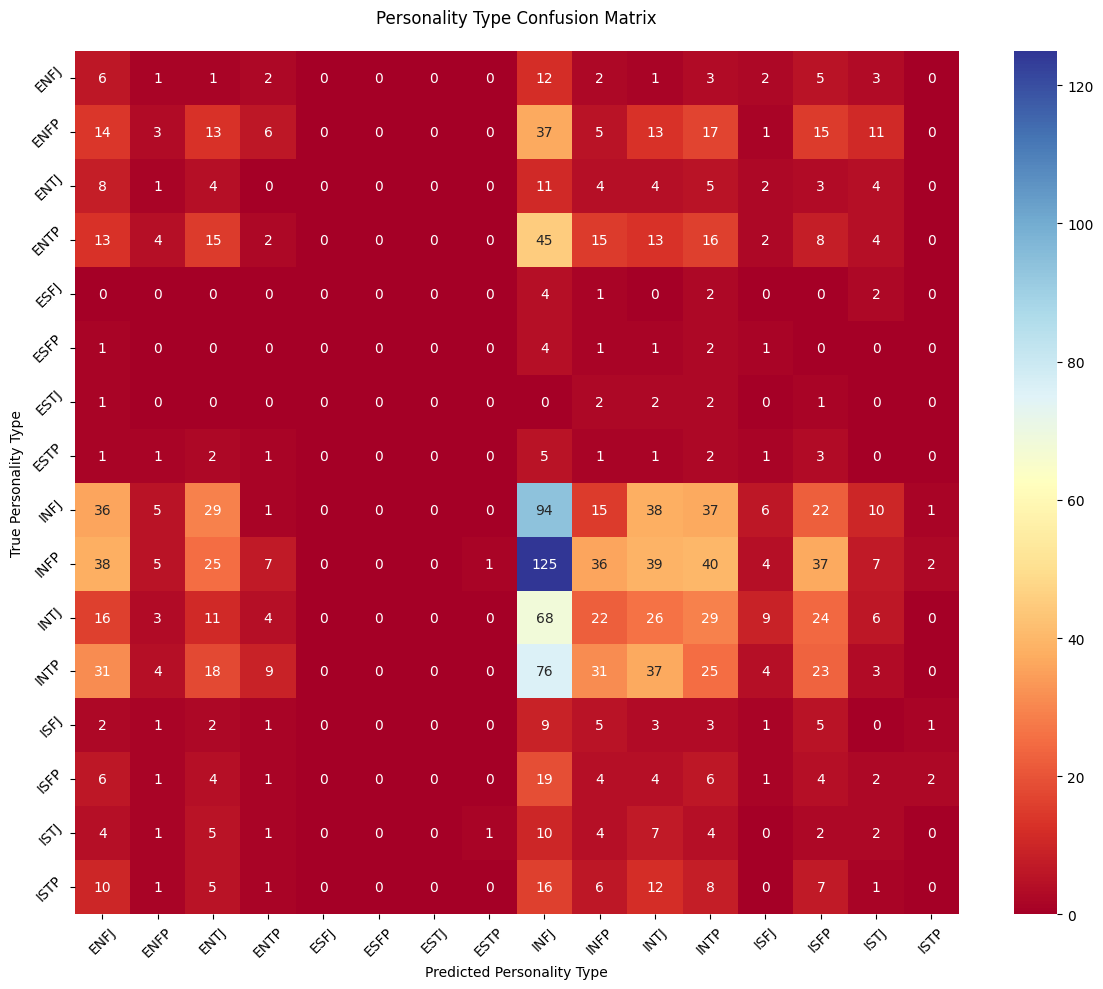

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


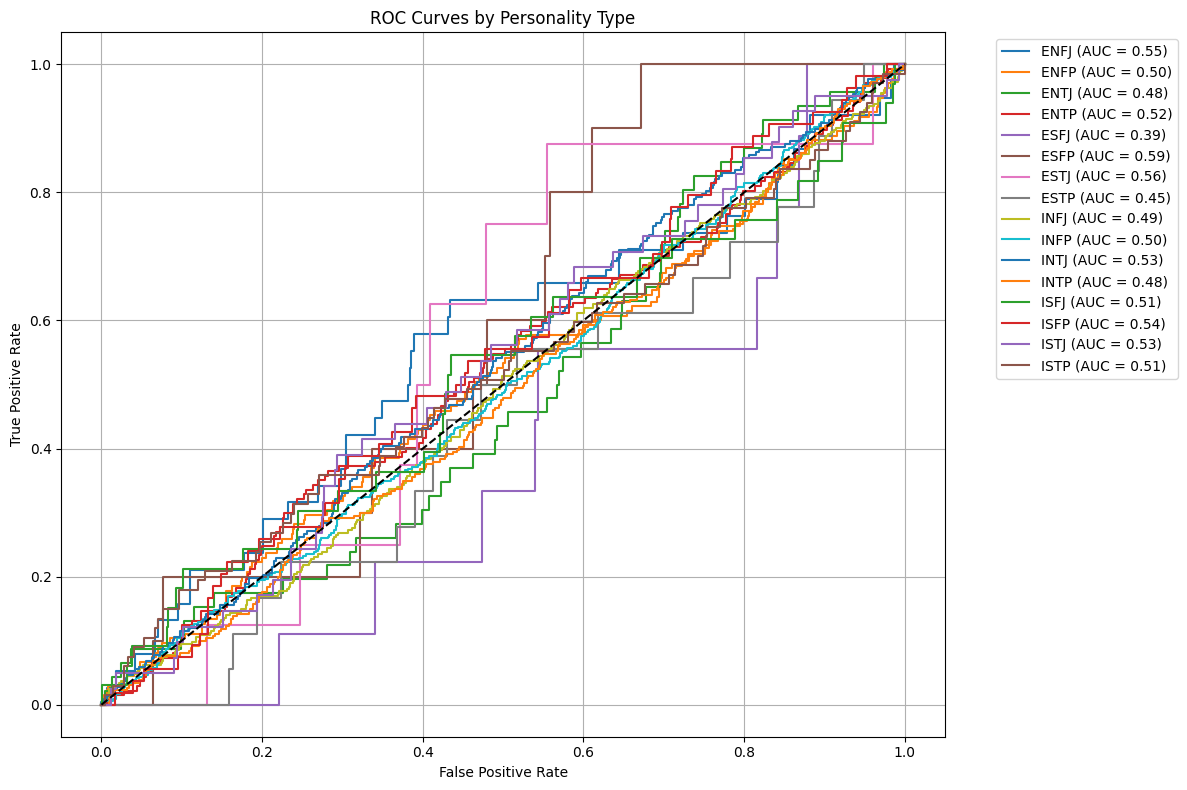

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


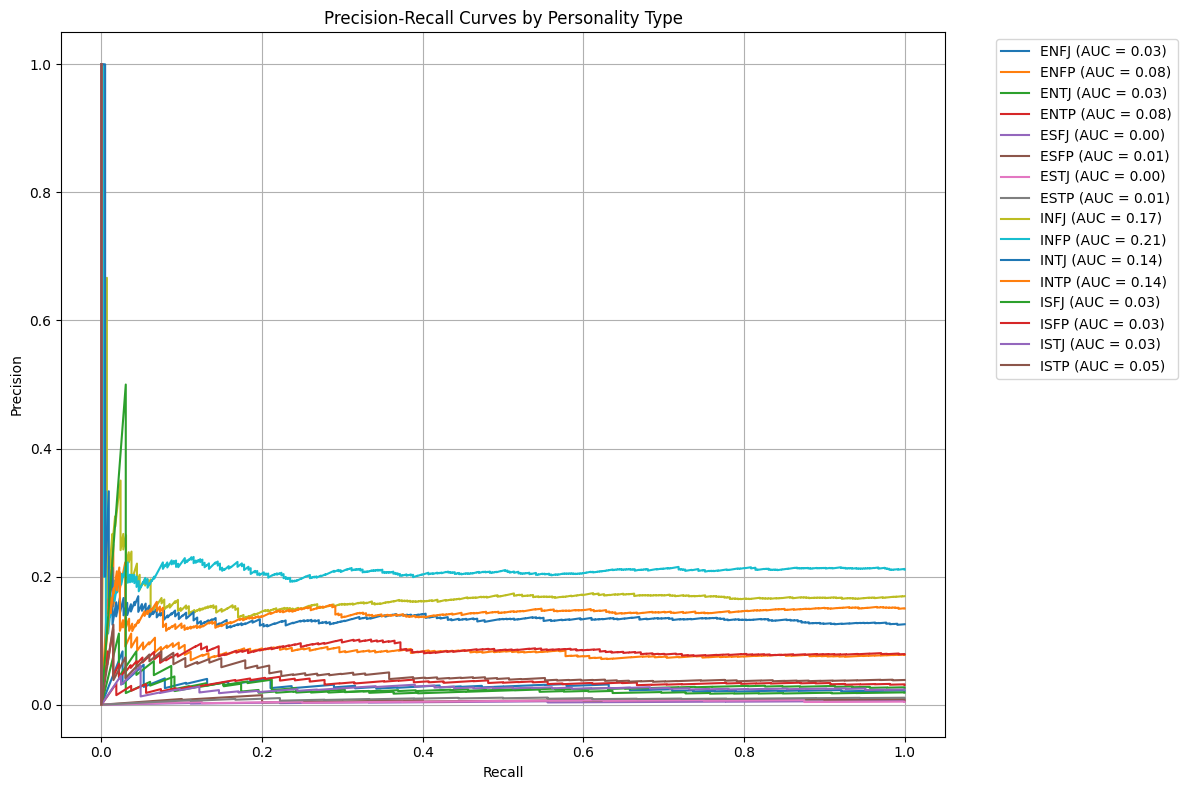


Fold 1/5
Epoch 1/30


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0564 - loss: 4.8260 - val_accuracy: 0.0072 - val_loss: 4.0313 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0739 - loss: 4.1009 - val_accuracy: 0.0353 - val_loss: 3.9584 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0692 - loss: 3.6424 - val_accuracy: 0.0699 - val_loss: 3.8712 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0719 - loss: 3.3865 - val_accuracy: 0.0699 - val_loss: 3.6252 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1118 - loss: 3.0649 - val_accuracy: 0.1009 - val_loss: 3.5934 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1189 - loss: 2.7275 - val_accuracy: 0.0937 - val_loss: 3.4298 - learning_rate: 0.0010
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1674 - loss: 2.4101 - val_accuracy: 0.07

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0568 - loss: 4.8105 - val_accuracy: 0.0245 - val_loss: 4.0855 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0613 - loss: 4.2740 - val_accuracy: 0.1657 - val_loss: 4.1005 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0797 - loss: 3.7197 - val_accuracy: 0.0396 - val_loss: 4.0584 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0842 - loss: 3.4329 - val_accuracy: 0.0324 - val_loss: 4.1851 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1077 - loss: 3.0744 - val_accuracy: 0.0303 - val_loss: 4.1461 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1400 - loss: 2.7796 - val_accuracy: 0.0331 - val_loss: 3.9925 - learning_rate: 0.0010
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1713 - loss: 2.4820 - val_accuracy: 0.08

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0563 - loss: 4.8621 - val_accuracy: 0.0375 - val_loss: 3.9726 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0780 - loss: 4.0752 - val_accuracy: 0.0367 - val_loss: 3.9226 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0756 - loss: 3.7688 - val_accuracy: 0.0893 - val_loss: 3.7507 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1029 - loss: 3.3797 - val_accuracy: 0.1232 - val_loss: 3.5939 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1016 - loss: 3.1005 - val_accuracy: 0.0497 - val_loss: 3.5349 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1212 - loss: 2.9085 - val_accuracy: 0.0756 - val_loss: 3.3625 - learning_rate: 0.0010
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1748 - loss: 2.4699 - val_accuracy: 0.08

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0557 - loss: 4.7369 - val_accuracy: 0.0382 - val_loss: 4.0519 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0602 - loss: 4.2070 - val_accuracy: 0.0829 - val_loss: 3.8396 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0644 - loss: 3.6039 - val_accuracy: 0.0829 - val_loss: 3.8975 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0855 - loss: 3.2624 - val_accuracy: 0.0829 - val_loss: 3.9201 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1133 - loss: 2.9404 - val_accuracy: 0.0829 - val_loss: 3.6660 - learning_rate: 0.0010
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1507 - loss: 2.6202 - val_accuracy: 0.0836 - val_loss: 3.4992 - learning_rate: 0.0010
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1974 - loss: 2.2376 - val_accuracy: 0.11

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.0489 - loss: 4.9540 - val_accuracy: 0.0389 - val_loss: 3.9470 - learning_rate: 0.0010
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0674 - loss: 4.3993 - val_accuracy: 0.0389 - val_loss: 4.1043 - learning_rate: 0.0010
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0794 - loss: 3.7288 - val_accuracy: 0.0432 - val_loss: 4.1112 - learning_rate: 0.0010
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.0917 - loss: 3.4597 - val_accuracy: 0.1599 - val_loss: 3.9801 - learning_rate: 0.0010
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0970 - loss: 3.2606 - val_accuracy: 0.1599 - val_loss: 3.8883 - learning_rate: 2.0000e-04
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1157 - loss: 3.0608 - val_accuracy: 0.1520 - val_loss: 3.6923 - learning_rate: 2.0000e-04
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1306 - loss: 2.9512 - val_accura

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pickle
import os

class PersonalityClassifier:
    def __init__(self, max_words=2500, max_len=50, embedding_dim=128):
        self.MAX_WORDS = max_words
        self.MAX_LEN = max_len
        self.EMBEDDING_DIM = embedding_dim
        self.tokenizer = Tokenizer(num_words=max_words)
        self.label_encoder = LabelEncoder()
        self.model = None
        self.history = None
    
    def preprocess_data(self, X, y):
        self.tokenizer.fit_on_texts(X)
        X_sequences = self.tokenizer.texts_to_sequences(X)
        X_padded = pad_sequences(X_sequences, maxlen=self.MAX_LEN)
        y_encoded = self.label_encoder.fit_transform(y)
        return X_padded, y_encoded
    
    def build_model(self, num_classes):
        self.model = Sequential([
            Embedding(self.MAX_WORDS, self.EMBEDDING_DIM, input_length=self.MAX_LEN),
            Conv1D(64, 5, activation='relu', padding='same'),
            BatchNormalization(),
            Conv1D(32, 3, activation='relu', padding='same'),
            BatchNormalization(),
            GlobalMaxPooling1D(),
            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(0.5),
            Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ])
        
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.model.compile(
            optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return self.model
    
    def train_model(self, X_train, y_train, epochs=30, batch_size=64):
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            mode='min'
        )
        
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=3,
            min_lr=1e-6,
            mode='min'
        )
        
        checkpoint = ModelCheckpoint(
            'best_model.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
        
        # Calculate class weights
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(y_train),
            y=y_train
        )
        class_weight_dict = dict(enumerate(class_weights))
        
        self.history = self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            class_weight=class_weight_dict,
            callbacks=[early_stopping, reduce_lr, checkpoint],
            verbose=1
        )
    
    def plot_training_history(self):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot accuracy
        ax1.plot(self.history.history['accuracy'], 'b-', label='Train Accuracy')
        ax1.plot(self.history.history['val_accuracy'], 'r--x', label='Validation Accuracy')
        ax1.set_title('Training and Validation Accuracy')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.grid(True)
        ax1.legend()
        
        # Plot loss
        ax2.plot(self.history.history['loss'], 'b-', label='Train Loss')
        ax2.plot(self.history.history['val_loss'], 'r--x', label='Validation Loss')
        ax2.set_title('Training and Validation Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.grid(True)
        ax2.legend()
        
        plt.tight_layout()
        plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred):
        y_true_labels = self.label_encoder.inverse_transform(y_true)
        y_pred_labels = self.label_encoder.inverse_transform(y_pred)
        
        cm = confusion_matrix(y_true_labels, y_pred_labels)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, 
                   annot=True, 
                   fmt='d',
                   cmap='RdYlBu',
                   xticklabels=self.label_encoder.classes_,
                   yticklabels=self.label_encoder.classes_)
        plt.title('Personality Type Confusion Matrix', pad=20)
        plt.ylabel('True Personality Type')
        plt.xlabel('Predicted Personality Type')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.tight_layout()
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_roc_curves(self, X_test, y_test):
        y_pred_proba = self.model.predict(X_test)
        n_classes = len(self.label_encoder.classes_)
        
        plt.figure(figsize=(12, 8))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, 
                    label=f'{self.label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves by Personality Type')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_precision_recall_curves(self, X_test, y_test):
        y_pred_proba = self.model.predict(X_test)
        n_classes = len(self.label_encoder.classes_)
        
        plt.figure(figsize=(12, 8))
        for i in range(n_classes):
            precision, recall, _ = precision_recall_curve(
                (y_test == i).astype(int), 
                y_pred_proba[:, i]
            )
            pr_auc = auc(recall, precision)
            plt.plot(recall, precision, 
                    label=f'{self.label_encoder.classes_[i]} (AUC = {pr_auc:.2f})')
        
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curves by Personality Type')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def k_fold_validate(self, X, y, n_splits=5):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
            print(f'\nFold {fold + 1}/{n_splits}')
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            self.build_model(len(np.unique(y)))
            self.train_model(X_train, y_train)
            score = self.model.evaluate(X_val, y_val)[1]
            scores.append(score)
            
        print(f'\nK-fold validation results:')
        print(f'Mean accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
        return np.mean(scores), np.std(scores)
    
    def save_model(self, model_dir='model_artifacts'):
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
        
        self.model.save(f'{model_dir}/model.keras')
        
        with open(f'{model_dir}/tokenizer.pickle', 'wb') as handle:
            pickle.dump(self.tokenizer, handle)
        
        with open(f'{model_dir}/label_encoder.pickle', 'wb') as handle:
            pickle.dump(self.label_encoder, handle)
    
    def predict(self, text):
        sequences = self.tokenizer.texts_to_sequences([text])
        padded = pad_sequences(sequences, maxlen=self.MAX_LEN)
        prediction = self.model.predict(padded)
        predicted_class = self.label_encoder.inverse_transform([np.argmax(prediction)])
        return predicted_class[0]

def main():
    # Load your data
    # X = your_text_data
    # y = your_labels
    
    classifier = PersonalityClassifier()
    
    # Preprocess data
    X_padded, y_encoded = classifier.preprocess_data(X, y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_padded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )
    
    # Build and train model
    classifier.build_model(num_classes=len(np.unique(y_encoded)))
    classifier.train_model(X_train, y_train)
    
    # Generate visualizations
    classifier.plot_training_history()
    
    # Evaluate model
    y_pred = classifier.model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print("\nClassification Report:")
    print(classification_report(
        y_test, 
        y_pred_classes,
        target_names=classifier.label_encoder.classes_
    ))
    
    # Generate additional visualizations
    classifier.plot_confusion_matrix(y_test, y_pred_classes)
    classifier.plot_roc_curves(X_test, y_test)
    classifier.plot_precision_recall_curves(X_test, y_test)
    
    # K-fold validation
    mean_score, std_score = classifier.k_fold_validate(X_padded, y_encoded)
    
    # Save model
    classifier.save_model()

if __name__ == "__main__":
    main()


NameError: name 'X_padded' is not defined